<a href="https://colab.research.google.com/github/nasiksami/Deep-Learning/blob/main/fyp2_initial%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir = '/content/drive/My Drive/dataset_resized/'

In [ ]:
#! unzip dataset-resized -d datasets

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.5.0-dev20201120'

In [ ]:
model=keras.applications.ResNet50(weights="imagenet")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [ ]:
def plot_image(url):
  image=keras.preprocessing.image.load_img(url,target_size=(224,224))
  img=img_to_array(image)
  img=img/255.0
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ewaste (9).jpeg to ewaste (9).jpeg


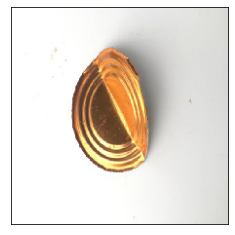

In [ ]:
plot_image("/content/drive/My Drive/dataset_resized/training/metal/metal2.jpg")

In [ ]:
image=keras.preprocessing.image.load_img("/content/drive/My Drive/dataset_resized/training/metal/metal2.jpg",target_size=(224,224))
img=img_to_array(image)

In [ ]:
img=img[np.newaxis]

In [ ]:
img.max()

255.0

In [ ]:
scaled_img=keras.applications.resnet50.preprocess_input(img)

In [ ]:
scaled_img.max()

151.061

In [ ]:
scaled_img.shape

(1, 224, 224, 3)

Let's Apply Resnet Architechture

In [ ]:
predictions=model.predict(scaled_img)

In [ ]:
print("Predictions:",keras.applications.resnet50.decode_predictions(predictions,top=5)[0])

40960/35363 [==================================] - 0s 0us/step
Predictions: [('n02971356', 'carton', 0.5071724), ('n03291819', 'envelope', 0.16329086), ('n02808304', 'bath_towel', 0.084289245), ('n03207941', 'dishwasher', 0.025451887), ('n03127925', 'crate', 0.018747339)]


In [ ]:
base_model=keras.applications.ResNet50(include_top=False,weights="imagenet")

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for i,layer in enumerate(base_model.layers):
  print(i,layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
base_model.trainable=False

In [ ]:
global_avg_pool=keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction=keras.layers.Dense(1,activation="sigmoid")(global_avg_pool)
resnet_model=keras.models.Model(inputs=base_model.input,outputs=prediction)

In [ ]:
train_data_gen=ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,
                                  zoom_range=0.3,brightness_range=[0.9,1.2],
                                  shear_range=0.3)

In [ ]:
test_data_gen=ImageDataGenerator(rescale=1/255.0)

In [ ]:
import os
os.chdir("/content/drive/My Drive/dataset_resized")
!ls

testing  training


In [ ]:
train_data=test_data_gen.flow_from_directory("/content/drive/My Drive/dataset_resized/training",batch_size=32,target_size=(224,224),shuffle=True,class_mode="binary")

Found 2414 images belonging to 7 classes.


In [ ]:
test_data=test_data_gen.flow_from_directory("/content/drive/My Drive/dataset_resized/testing",batch_size=32,target_size=(224,224),shuffle=True,class_mode="binary")

Found 608 images belonging to 7 classes.


In [ ]:
resnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model_new=keras.models.Sequential([
                                   base_model,
                                   keras.layers.GlobalAveragePooling2D(),
                                   keras.layers.Dense(1024,activation="relu"),
                                   keras.layers.Dense(1024,activation="relu"),
                                   keras.layers.Dense(1024,activation="relu"),
                                   keras.layers.Dense(512,activation="relu"),
                                   keras.layers.Dense(1,activation="softmax")
])

In [ ]:
model_new.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
import numpy as np
from datetime import datetime
import time
#from sklearn import tree
#from sklearn.preprocessing import normalize, scale
from sklearn.metrics import accuracy_score
fmt = '%H:%M:%S'
def get_current_time():
    time.ctime()
    return time.strftime(fmt)
first = get_current_time()

In [ ]:
early_stop=keras.callbacks.EarlyStopping(patience=5,mode="max",monitor="val_accuracy",verbose=2)
check=keras.callbacks.ModelCheckpoint(mode="max",monitor="val_accuracy",verbose=2,filepath="resnet50.h5",save_best_only=True)
model_new.fit(train_data,validation_data=(test_data),epochs=50,callbacks=[early_stop,check])

Epoch 1/50
76/76 [==============================] - 1380s 18s/step - loss: 0.0000e+00 - accuracy: 0.1636 - val_loss: 0.0000e+00 - val_accuracy: 0.1645

Epoch 00001: val_accuracy improved from -inf to 0.16447, saving model to resnet50.h5
Epoch 2/50
76/76 [==============================] - 425s 6s/step - loss: 0.0000e+00 - accuracy: 0.1636 - val_loss: 0.0000e+00 - val_accuracy: 0.1645

Epoch 00002: val_accuracy did not improve from 0.16447
Epoch 3/50
76/76 [==============================] - 410s 5s/step - loss: 0.0000e+00 - accuracy: 0.1636 - val_loss: 0.0000e+00 - val_accuracy: 0.1645

Epoch 00003: val_accuracy did not improve from 0.16447
Epoch 4/50
76/76 [==============================] - 411s 5s/step - loss: 0.0000e+00 - accuracy: 0.1636 - val_loss: 0.0000e+00 - val_accuracy: 0.1645

Epoch 00004: val_accuracy did not improve from 0.16447
Epoch 5/50
76/76 [==============================] - 429s 6s/step - loss: 0.0000e+00 - accuracy: 0.1636 - val_loss: 0.0000e+00 - val_accuracy: 0.1645

In [ ]:

second = get_current_time()
print("Time taken to train(sec):", datetime.strptime(second, fmt) - datetime.strptime(first, fmt))

Time taken to train(sec): 0:58:31


In [ ]:
model=keras.models.load_model("/content/drive/My Drive/dataset_resized/resnet50.h5")
#model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.evaluate(test_data)

19/19 [==============================] - 88s 5s/step - loss: 0.0000e+00 - accuracy: 0.1785


[0.0, 0.16447368264198303]

In [ ]:
# Now Let's Apply Mobilenet Architechture

In [ ]:
base_model=keras.applications.MobileNetV2(include_top=False,input_shape=(224,224,3),weights="imagenet") 

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable=False

In [ ]:
global_avg_pool=keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction=keras.layers.Dense(1,activation="sigmoid")(global_avg_pool)
mobile_model=keras.models.Model(inputs=base_model.input,outputs=prediction)

In [ ]:
mobile_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
early_stop=keras.callbacks.EarlyStopping(patience=5,mode="max",monitor="val_accuracy",verbose=2)
check=keras.callbacks.ModelCheckpoint(mode="max",monitor="val_accuracy",verbose=2,filepath="My_model.h5",save_best_only=True)
mobile_model.fit(train_data,validation_data=(test_data),epochs=50,callbacks=[early_stop,check])

Epoch 1/50
76/76 [==============================] - 114s 1s/step - loss: 0.0000e+00 - accuracy: 0.1699 - val_loss: 0.0000e+00 - val_accuracy: 0.1645

Epoch 00001: val_accuracy improved from -inf to 0.16447, saving model to My_model.h5
Epoch 2/50
76/76 [==============================] - 113s 1s/step - loss: 0.0000e+00 - accuracy: 0.1703 - val_loss: 0.0000e+00 - val_accuracy: 0.1645

Epoch 00002: val_accuracy did not improve from 0.16447
Epoch 3/50
76/76 [==============================] - 114s 1s/step - loss: 0.0000e+00 - accuracy: 0.1767 - val_loss: 0.0000e+00 - val_accuracy: 0.1645

Epoch 00003: val_accuracy did not improve from 0.16447
Epoch 4/50
76/76 [==============================] - 116s 2s/step - loss: 0.0000e+00 - accuracy: 0.1537 - val_loss: 0.0000e+00 - val_accuracy: 0.1645

Epoch 00004: val_accuracy did not improve from 0.16447
Epoch 5/50
76/76 [==============================] - 116s 2s/step - loss: 0.0000e+00 - accuracy: 0.1695 - val_loss: 0.0000e+00 - val_accuracy: 0.1645



In [ ]:
model=keras.models.load_model("/content/drive/My Drive/dataset_resized/My_model.h5")
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.evaluate(test_data)

19/19 [==============================] - 24s 1s/step - loss: 0.0000e+00 - accuracy: 0.1565


[0.0, 0.16447368264198303]

In [ ]:
test_data.class_indices

{'cardboard': 0,
 'ewaste': 1,
 'glass': 2,
 'metal': 3,
 'paper': 4,
 'plastic': 5,
 'trash': 6}

In [ ]:
def predict_image_class(url):
  image=keras.preprocessing.image.load_img(url,target_size=(224,224))
  img=img_to_array(image)
  img=img/255.0
  pred_img=img[np.newaxis]
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  pred=model.predict(pred_img)
  if pred <0.5:
    plt.xlabel("glass")
  else:
    plt.xlabel("paper")
  plt.show()

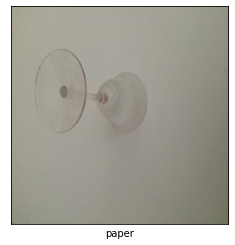

In [ ]:
predict_image_class("/content/drive/My Drive/dataset_resized/testing/glass/glass12.jpg")

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.3.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dir = '/content/drive/My Drive/dataset_resized/'

In [7]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

train_data_gen=ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,
                                  zoom_range=0.3,brightness_range=[0.9,1.2],
                                  shear_range=0.3)
test_data_gen=ImageDataGenerator(rescale=1/255.0)

train_data=test_data_gen.flow_from_directory("/content/drive/My Drive/dataset_resized/training",batch_size=32,target_size=(224,224),shuffle=True,class_mode="binary")
test_data=test_data_gen.flow_from_directory("/content/drive/My Drive/dataset_resized/testing",batch_size=32,target_size=(224,224),shuffle=True,class_mode="binary")

Found 2414 images belonging to 7 classes.
Found 608 images belonging to 7 classes.


CNN

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model,Model,Sequential
from keras.preprocessing.image import ImageDataGenerator,array_to_img,load_img
from keras.applications import MobileNetV2,ResNet50V2,VGG16

In [13]:
train_data_gen=ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,zoom_range=0.2,shear_range=0.2,brightness_range=[0.9,1.4])

In [17]:
train_file=test_data_gen.flow_from_directory("/content/drive/My Drive/dataset_resized/training",batch_size=32,target_size=(224,224),shuffle=True,class_mode="binary")
test_file=test_data_gen.flow_from_directory("/content/drive/My Drive/dataset_resized/testing",batch_size=32,target_size=(224,224),shuffle=True,class_mode="binary")

Found 2414 images belonging to 7 classes.
Found 608 images belonging to 7 classes.


zip kaj e lagenai

In [34]:
cardboard_dir = os.path.join('/content/drive/MyDrive/dataset_resized/training/cardboard')
paper_dir = os.path.join('/content/drive/MyDrive/dataset_resized/training/paper')
plastic_dir = os.path.join('/content/drive/MyDrive/dataset_resized/training/plastic')
glass_dir = os.path.join('/content/drive/MyDrive/dataset_resized/training/glass')
metal_dir = os.path.join('/content/drive/MyDrive/dataset_resized/training/metal')
trash_dir = os.path.join('/content/drive/MyDrive/dataset_resized/training/trash')
ewaste_dir = os.path.join('/content/drive/MyDrive/dataset_resized/training/ewaste')


In [35]:
print('total training cardboard images:', len(os.listdir(cardboard_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training plastic images:', len(os.listdir(plastic_dir)))
print('total training glass images:', len(os.listdir(glass_dir)))
print('total training metal images:', len(os.listdir(metal_dir)))
print('total training trash images:', len(os.listdir(trash_dir )))
print('total training ewaste images:', len(os.listdir(ewaste_dir )))

total training cardboard images: 322
total training paper images: 475
total training plastic images: 385
total training glass images: 400
total training metal images: 328
total training trash images: 109
total training ewaste images: 400


In [28]:
ls

drive/  sample_data/


In [38]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/dataset_resized/training"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

TRAINING_DIR = "/content/drive/MyDrive/dataset_resized/training"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Found 2414 images belonging to 7 classes.
Found 608 images belonging to 7 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_____________________________________

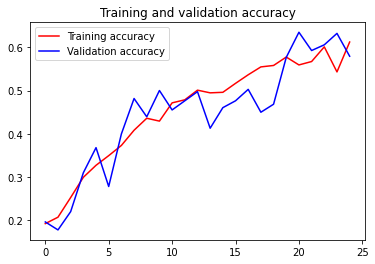

<Figure size 432x288 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [40]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving ewaste (60).JPG to ewaste (60).JPG
ewaste (60).JPG
[[0. 1. 0. 0. 0. 0. 0.]]


So it classifies correctly

In [48]:
import numpy as np
from datetime import datetime
import time
from sklearn import tree
from sklearn.preprocessing import normalize, scale
from sklearn.metrics import accuracy_score
fmt = '%H:%M:%S'

def get_current_time():
    time.ctime()
    return time.strftime(fmt)

In [49]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/dataset_resized/training"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/dataset_resized/testing"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("new_cnn.h5")


Found 2414 images belonging to 7 classes.
Found 608 images belonging to 7 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_____________________________________

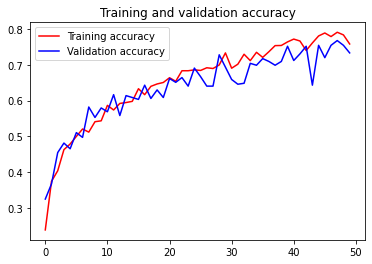

<Figure size 432x288 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [52]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving ewaste (256).jpg to ewaste (256).jpg
ewaste (256).jpg
[[0. 1. 0. 0. 0. 0. 0.]]


Lets try Mobilenet V2.

In [143]:

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),
                                               include_top=False,
                                               weights='imagenet')

In [144]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [145]:
for i,layer in enumerate(base_model.layers):
  print(i,layer.name)

0 input_3
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_expand
47 block_5_expand_BN
48 block_5_exp

In [146]:
base_model.trainable = False

In [147]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [148]:
#adding our own classifier
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [149]:
prediction_layer = keras.layers.Dense(1)

In [130]:
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax')

In [150]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
#  tf.keras.layers.Dense(512, activation='relu'),
 # tf.keras.layers.Dense(3, activation='softmax')
])

In [151]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


**Training our model**


In [152]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [153]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 5
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)

 5/20 [======>.......................] - 4s 736ms/step - loss: 1.9459 - accuracy: 0.7620


In [154]:
import numpy as np
from datetime import datetime
import time
#from sklearn import tree
#from sklearn.preprocessing import normalize, scale
from sklearn.metrics import accuracy_score
from keras import backend as K
from keras.callbacks import ModelCheckpoint
fmt = '%H:%M:%S'
def get_current_time():
    time.ctime()
    return time.strftime(fmt)
first = get_current_time()

In [155]:

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

In [156]:



history = model.fit(train_generator, epochs=50, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

acc = history.history['accuracy']
print(acc)

Epoch 1/50
20/20 [==============================] - 30s 1s/step - loss: 1.7557 - accuracy: 0.7907 - val_loss: 1.6237 - val_accuracy: 0.7918
Epoch 2/50
20/20 [==============================] - 29s 1s/step - loss: 1.5530 - accuracy: 0.8106 - val_loss: 1.4484 - val_accuracy: 0.8273
Epoch 3/50
20/20 [==============================] - 28s 1s/step - loss: 1.4138 - accuracy: 0.8302 - val_loss: 1.3331 - val_accuracy: 0.8337
Epoch 4/50
20/20 [==============================] - 28s 1s/step - loss: 1.3019 - accuracy: 0.8413 - val_loss: 1.1972 - val_accuracy: 0.8382
Epoch 5/50
20/20 [==============================] - 27s 1s/step - loss: 1.2163 - accuracy: 0.8505 - val_loss: 1.1307 - val_accuracy: 0.8469
Epoch 6/50
20/20 [==============================] - 28s 1s/step - loss: 1.1490 - accuracy: 0.8523 - val_loss: 1.0477 - val_accuracy: 0.8568
Epoch 7/50
20/20 [==============================] - 29s 1s/step - loss: 1.0840 - accuracy: 0.8621 - val_loss: 1.0124 - val_accuracy: 0.8605
Epoch 8/50
20/20 [==

In [157]:
second = get_current_time()
print("Time taken to train(sec):", datetime.strptime(second, fmt) - datetime.strptime(first, fmt))

Time taken to train(sec): 0:25:01


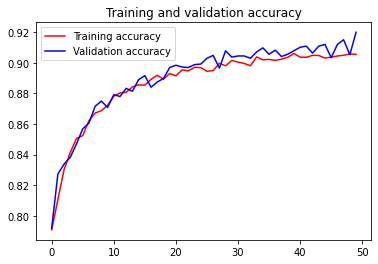

<Figure size 432x288 with 0 Axes>

In [158]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [160]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving glass64.jpg to glass64.jpg
glass64.jpg
[[-4.6035004  -0.72371566 -5.4054046  -1.7737067  -2.3621428  -4.6789527
  -4.8643503 ]]


In [163]:
model.save("mobilenet_v2.h5")  # we can save the model and reload it at anytime in the future
#new_model = tf.keras.models.load_model('mobilenet.h5')